# TP3: Modelización de un ADC #


## Descripción ##
El trabajo abarca la modelación y estudio de la simulación de un bloque de cuantización de un ADC de B bits en un rango de +-Vf Volts. Para ello, se simula el comportamiento al digitalizar una senoidal pura de energía normalizada contaminada con un ruido incorrelado y Gaussiano
Asimismo, se analiza el comportamiento de la señal digitalizada al variar la resolución de cuantización (B) y la potencia de ruido (kn).
Los resultados se visualizan en tres tipos de gráficos: la señal en el dominio temporal, el espectro de la señal y el histograma del ruido de cuantización.

## Parte A - Simulación ##

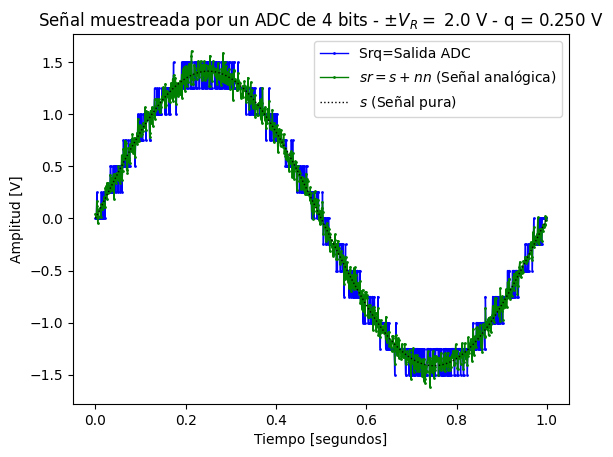

Text(0.5, 0, 'Error de cuantización[V]')

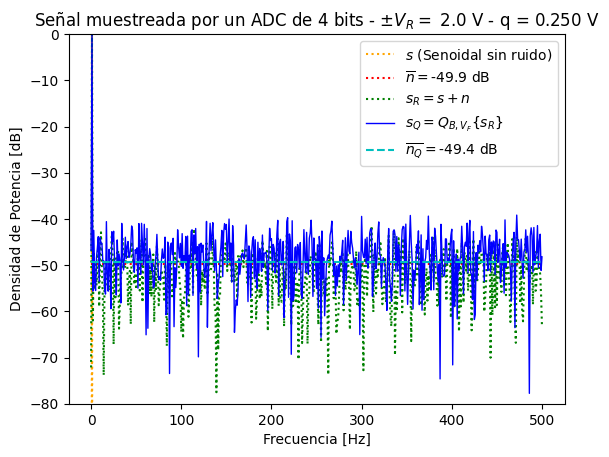

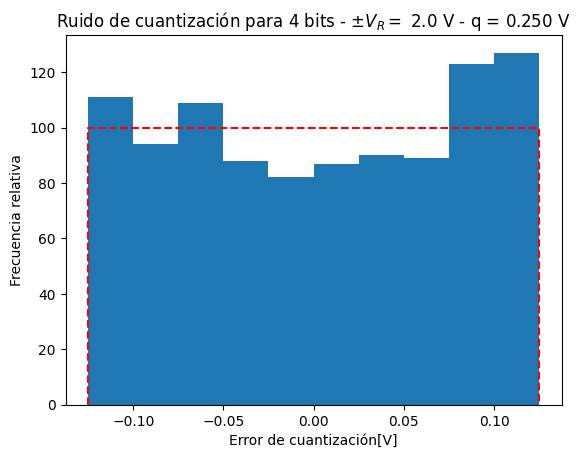

In [4]:
#%% módulos y funciones a importar
import numpy as np
import matplotlib.pyplot as plt

#%% Función para generar la señal seno
def seno(vmax, dc, ff, ph, N, fs):
    ts = 1/fs  # Paso de tiempo
    tiempoint = N * ts  # Intervalo total de tiempo
    tt = np.arange(start = 0, stop = tiempoint, step = ts)
    xx = vmax * np.sin( 2 * np.pi * ff * tt ) + dc
    return tt, xx

vmax = np.sqrt(2)
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000  # cantidad de muestras
ts = 1/fs # tiempo de muestreo
df =  fs/N# resolución espectral
tiempoint = N * ts
dc = 0
ff = 1

tt, xx = seno(vmax, dc, ff, 0, N, fs)

#%% Datos de la simulación
# Datos del ADC
B = 4 # bits
Vf = 2# rango simétrico de +/- Vf Volts
q =  Vf/2**(B-1)# paso de cuantización de q Volts
Pq = (q ** 2) / 12 # Watts 
kn = 1 # escala de la potencia de ruido analógico
Pn = Pq * kn # 

#%% Experimento: 
"""
   Se desea simular el efecto de la cuantización sobre una señal senoidal de 
   frecuencia 1 Hz. La señal "analógica" podría tener añadida una cantidad de 
   ruido gausiano e incorrelado.
   
   Se pide analizar el efecto del muestreo y cuantización sobre la señal 
   analógica. Para ello se proponen una serie de gráficas que tendrá que ayudar
   a construir para luego analizar los resultados.
   
"""

# np.random.normal
# np.random.uniform


# Señales

nn = np.random.normal(0, np.sqrt(Pn), N)



sr = xx + nn  # Señal con ruido


srq = q * np.round(sr / q)  # Señal cuantizada


nq = srq - sr  # Ruido de cuantización


#%% Visualización de resultados

# cierro ventanas anteriores
plt.close('all')

##################
# Señal temporal
##################

plt.figure(1)

plt.plot(tt, srq, lw=1, color='blue', marker='.', markersize=2, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label='Srq=Salida ADC')
plt.plot(tt, sr, lw=1, color='green', markersize=2, marker='.', label='$ sr = s + nn $ (Señal analógica)')
plt.plot(tt, xx, lw=1, color='black', ls='dotted', label='$ s $ (Señal pura)')

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

###########
# Espectro
###########

plt.figure(2)
ft_SR = 1/N*np.fft.fft( sr)
ft_Srq = 1/N*np.fft.fft( srq)
ft_SP = 1/N*np.fft.fft( xx)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nn = 1/N*np.fft.fft( nn)

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2 #hasta nyquist, por la simetría de la fft, lo demás es redundante.

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SP[bfrec])**2), color='orange', ls='dotted', label='$ s $ (Senoidal sin ruido)' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ),  color='red', ls='dotted', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), color='green', ls = 'dotted', label='$ s_R = s + n $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), color='blue',lw=1, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
# plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.ylim([-80, 0]) 

axes_hdl = plt.gca()
axes_hdl.legend()

#############
# Histograma
#############

plt.figure(3)
bins = 10
plt.hist(nq.flatten(), bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))
plt.ylabel('Frecuencia relativa')
plt.xlabel('Error de cuantización[V]')



## Parte B - (Variación de parámetros) ##

### Variación del numero de bits ###

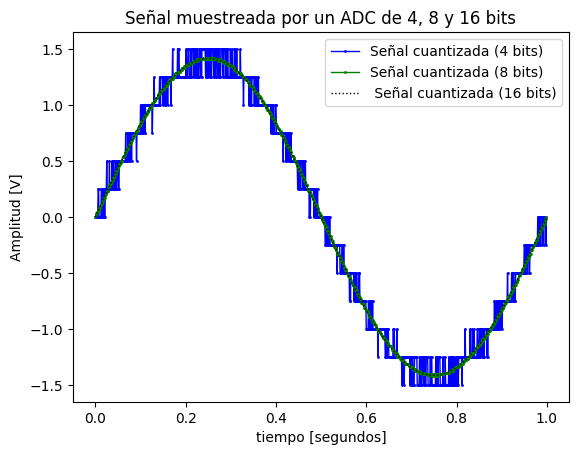

Text(0.5, 0, 'Error de cuantización[V]')

In [ ]:
#%% módulos y funciones a importar
import numpy as np
import matplotlib.pyplot as plt

#%% Función para generar la señal seno
def seno(vmax, dc, ff, ph, N, fs):
    ts = 1/fs  # Paso de tiempo
    tiempoint = N * ts  # Intervalo total de tiempo
    tt = np.arange(start = 0, stop = tiempoint, step = ts)
    xx = vmax * np.sin( 2 * np.pi * ff * tt ) + dc
    return tt, xx

vmax = np.sqrt(2)
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000  # cantidad de muestras
ts = 1/fs # tiempo de muestreo
df =  fs/N# resolución espectral
tiempoint = N * ts
dc = 0
ff = 1

tt, xx = seno(vmax, dc, ff, 0, N, fs)

#%% Datos de la simulación
# Datos del ADC
B = 4 # bits
B2 = 8
B3 = 16

Vf = 2# rango simétrico de +/- Vf Volts

q =  Vf/2**(B-1)# paso de cuantización de q Volts
q2 = Vf/2**(B2-1)
q3 =Vf/2**(B3-1)


# datos del ruido (potencia de la señal normalizada, es decir 1 W)
Pq = (q ** 2) / 12 # Watts 
Pq2 = (q2 ** 2) / 12
Pq3 = (q3 ** 2) / 12

kn = 1 # escala de la potencia de ruido analógico
kn2 = 1/10
kn3 = 10

Pn = Pq * kn # 
Pn2 = Pq2 * kn
Pn3 = Pq3 * kn
# Pn2 = Pq * kn2
# Pn3 = Pq * kn3

# Señales

nn = np.random.normal(0, np.sqrt(Pn), N)
nn2 = np.random.normal(0, np.sqrt(Pn2), N)
nn3 = np.random.normal(0, np.sqrt(Pn3), N)


sr = xx + nn  # Señal con ruido
sr2 = xx + nn2  # Señal con ruido
sr3 = xx + nn3  # Señal con ruido

srq = q * np.round(sr / q)  # Señal cuantizada
srq2 = q2 * np.round(sr2 / q2)
srq3 = q3 * np.round(sr3 / q3)


nq = srq - sr  # Ruido de cuantización
nq2 = srq2 - sr2
nq3 = srq3 - sr3


#%% Visualización de resultados

# cierro ventanas anteriores
plt.close('all')

##################
# Señal temporal
##################
plt.figure(1)

plt.plot(tt, srq, lw=1, color='blue', marker='.', markersize=2, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label='Señal cuantizada (4 bits)')
plt.plot(tt, srq2, lw=1, color='green', markersize=2, marker='.', label='Señal cuantizada (8 bits)')
plt.plot(tt, srq3, lw=1, color='black', ls='dotted', label=' Señal cuantizada (16 bits)')

plt.title('Señal muestreada por un ADC de 4, 8 y 16 bits')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

plt.figure(1)
######
# Espectro
###########

plt.figure(2)
ft_SR = 1/N*np.fft.fft( sr)


ft_Srq = 1/N*np.fft.fft( srq)
ft_Srq2 = 1/N*np.fft.fft( srq2)
ft_Srq3 = 1/N*np.fft.fft( srq3)

ft_SP = 1/N*np.fft.fft( xx)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nq2 = 1/N*np.fft.fft( nq2)
ft_Nq3 = 1/N*np.fft.fft( nq3)

ft_Nn = 1/N*np.fft.fft( nn)
ft_Nn2 = 1/N*np.fft.fft( nn2)
ft_Nn3 = 1/N*np.fft.fft( nn3)


# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2 #hasta nyquist, por la simetría de la fft, lo demás es redundante.

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
Nnq2_mean = np.mean(np.abs(ft_Nq2)**2)
Nnq3_mean = np.mean(np.abs(ft_Nq3)**2)

nNn_mean = np.mean(np.abs(ft_Nn)**2)
nNn2_mean = np.mean(np.abs(ft_Nn2)**2)
nNn3_mean = np.mean(np.abs(ft_Nn3)**2)

#plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SP[bfrec])**2), color='orange', ls='dotted', label='$ s $ (Senoidal sin ruido)' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ),  color='red', ls='dotted', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn2_mean, nNn2_mean]) ),  color='orange', ls='dotted', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn2_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn3_mean, nNn3_mean]) ),  color='magenta', ls='dotted', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn3_mean)) )

#plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), color='green', ls = 'dotted', label='$ s_R = s + n $' )
#plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), color='blue',lw=1, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )

plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--r', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq2_mean, Nnq2_mean]) ), '--o', label='$ \overline{n2_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq2_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq3_mean, Nnq3_mean]) ), '--m', label='$ \overline{n3_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq3_mean)) )

# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
# plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.ylim([-80, 0]) 

axes_hdl = plt.gca()
axes_hdl.legend()

#############
# Histograma
#############

plt.figure(3)
bins = 10
plt.hist(nq.flatten(), bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))
plt.ylabel('Frecuencia relativa')
plt.xlabel('Error de cuantización[V]')

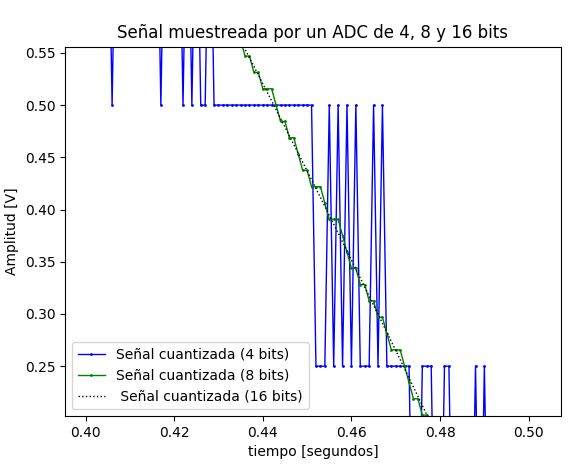

### Discusión de resultados  ###
Para estudiar el efecto de la variación del parámetro B (número de bits del conversor), se modificó el código de implementación. La visualización de la señal temporal refleja la influencia del número de bits en el paso de cuantización. Se observa que a medida que la resolución del conversor (número de bits) aumenta, el número de niveles de cuantización también lo hace. Esto permite visualizar una señal con mayor amplitud, lo cual es especificamente útil para señales de baja amplitud.
A nivel práctico, se concluye que un ADC con un mayor número de bits es preferible, puesto que reduce el ruido de cuantización y mejora la fidelidad de la señal. No obtante, la diferencia en la resucción de ruido de cuantización entre B=8 y B=16 no es tan significativa. Esto sugiere que, en aplicaciones donde no se requiere una alta precisión, un ADC de 8 bits ofrece un balance adecuado entre calidad de señal y demanda computacional.

### Variación del factor de escala de potencia de ruido analógico ###

In [ ]:
#%% módulos y funciones a importar
import numpy as np
import matplotlib.pyplot as plt

#%% Función para generar la señal seno
def seno(vmax, dc, ff, ph, N, fs):
    ts = 1/fs  # Paso de tiempo
    tiempoint = N * ts  # Intervalo total de tiempo
    tt = np.arange(start = 0, stop = tiempoint, step = ts)
    xx = vmax * np.sin( 2 * np.pi * ff * tt ) + dc
    return tt, xx

vmax = np.sqrt(2)
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000  # cantidad de muestras
ts = 1/fs # tiempo de muestreo
df =  fs/N# resolución espectral
tiempoint = N * ts
dc = 0
ff = 1

tt, xx = seno(vmax, dc, ff, 0, N, fs)

#%% Datos de la simulación
# Datos del ADC
B = 4 # bits
# B2 = 8
# B3 = 16

Vf = 2# rango simétrico de +/- Vf Volts

q =  Vf/2**(B-1)# paso de cuantización de q Volts
# q2 = Vf/2**(B2-1)
# q3 =Vf/2**(B3-1)


# datos del ruido (potencia de la señal normalizada, es decir 1 W)
Pq = (q ** 2) / 12 # Watts 
# Pq2 = (q2 ** 2) / 12
# Pq3 = (q3 ** 2) / 12

kn = 1 # escala de la potencia de ruido analógico
kn2 = 1/10
kn3 = 10

Pn = Pq * kn # 
# Pn2 = Pq2 * kn
# Pn3 = Pq3 * kn
Pn2 = Pq * kn2
Pn3 = Pq * kn3

# Señales

nn = np.random.normal(0, np.sqrt(Pn), N)
nn2 = np.random.normal(0, np.sqrt(Pn2), N)
nn3 = np.random.normal(0, np.sqrt(Pn3), N)


sr = xx + nn  # Señal con ruido
sr2 = xx + nn2  # Señal con ruido
sr3 = xx + nn3  # Señal con ruido

srq = q * np.round(sr / q)  # Señal cuantizada
srq2 = q * np.round(sr2 / q)
srq3 = q * np.round(sr3 / q)


nq = srq - sr  # Ruido de cuantización
nq2 = srq2 - sr2
nq3 = srq3 - sr3


#%% Visualización de resultados

# cierro ventanas anteriores
plt.close('all')

##################
# Señal temporal
##################
plt.figure(1)

plt.plot(tt, srq, lw=1, color='blue', ls = 'dotted', marker='.', markersize=1, markerfacecolor='blue', label='Señal cuantizada (kn=1)')
plt.plot(tt, srq2, lw=1, color='green', ls = 'dotted',  markersize=1, marker='.', label='Señal cuantizada (kn=1/10)')
plt.plot(tt, srq3, lw=1, color='red',  ls = 'dotted', marker='.',markersize=1,label=' Señal cuantizada (kn=10)')

plt.title('Señal muestreada para kn={1,1/10,10}')
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

plt.figure(1)
######
# Espectro
###########

plt.figure(2)
ft_SR = 1/N*np.fft.fft( sr)


ft_Srq = 1/N*np.fft.fft( srq)
ft_Srq2 = 1/N*np.fft.fft( srq2)
ft_Srq3 = 1/N*np.fft.fft( srq3)

ft_SP = 1/N*np.fft.fft( xx)
ft_Nq = 1/N*np.fft.fft( nq)
ft_Nq2 = 1/N*np.fft.fft( nq2)
ft_Nq3 = 1/N*np.fft.fft( nq3)

ft_Nn = 1/N*np.fft.fft( nn)
ft_Nn2 = 1/N*np.fft.fft( nn2)
ft_Nn3 = 1/N*np.fft.fft( nn3)


# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2 #hasta nyquist, por la simetría de la fft, lo demás es redundante.

Nnq_mean = np.mean(np.abs(ft_Nq)**2)
Nnq2_mean = np.mean(np.abs(ft_Nq2)**2)
Nnq3_mean = np.mean(np.abs(ft_Nq3)**2)

nNn_mean = np.mean(np.abs(ft_Nn)**2)
nNn2_mean = np.mean(np.abs(ft_Nn2)**2)
nNn3_mean = np.mean(np.abs(ft_Nn3)**2)

#plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SP[bfrec])**2), color='orange', ls='dotted', label='$ s $ (Senoidal sin ruido)' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ),  color='red', ls='dotted', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn2_mean, nNn2_mean]) ),  color='orange', ls='dotted', label= '$ \overline{n2} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn2_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn3_mean, nNn3_mean]) ),  color='magenta', ls='dotted', label= '$ \overline{n3} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn3_mean)) )

#plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), color='green', ls = 'dotted', label='$ s_R = s + n $' )
#plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), color='blue',lw=1, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )

plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--r', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq2_mean, Nnq2_mean]) ), '--o', label='$ \overline{n2_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq2_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq3_mean, Nnq3_mean]) ), '--m', label='$ \overline{n3_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq3_mean)) )

# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
# plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.ylim([-80, 0]) 

axes_hdl = plt.gca()
axes_hdl.legend()

#############
# Histograma
#############

plt.figure(3)
bins = 10
plt.hist(nq.flatten(), bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))
plt.ylabel('Frecuencia relativa')
plt.xlabel('Error de cuantización[V]')

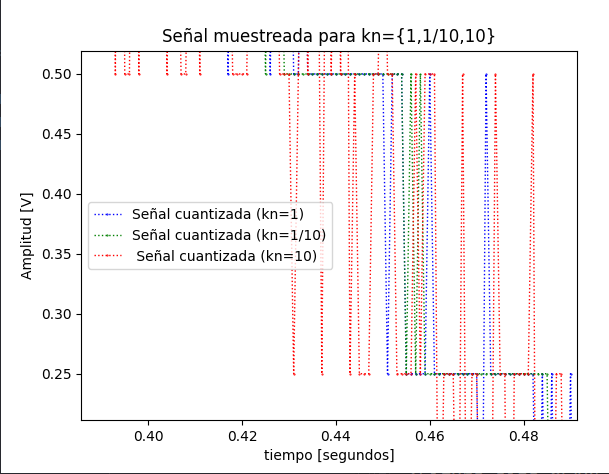

### Discusión de resultados ###
Asimismo, se estudio el efecto de la variación de kn, la escala de potencia de ruido analógico. Los efectos observables en la simulación sugieren que el número de niveles de cuantización se mantiene constante, esto se debe a que la amplitud de los saltos cuantizados se mantiene igual para las tres señales obtenidas en dominio temporal. Para valores altos de kn, la potencia de ruido analógico es mayor, esto introduce una mayor variabilidad, produciendo una señal cuantizada que tiende a mantenerse en un mismo nivel por más tiempo. 
A medida que kn aumenta, el ruido analógico previo a la cuantización es mayor, lo que produce una señal cuantizada más estable en el tiempo (transiciones más lentas), que no reproducen en detalle la estructura original de la señal.

### Observación ###
La variación del número de bits tiene un efecto sobre la potencia de ruido introducido en el proceso de cuantización, mientras que la variación del factor de potencia de ruido analógico incide directamente en la potencia de ruido de la señal antes de pasar por el bloque de cuantización. Dado que el ruido que prevalece luego del ADC es el mayor de los dos, resulta crucial a la hora de elegir un ADC la consideración del ruido de fondo. Si el ruido analógico es alto, un aumento de la resolución no proporciona beneficios significativos.


## Ejercicio Adicional ##

### SNR ###

Para un conversor de N bits con un rango completo de voltaje $V_fs$, la varianza $\sigma^2_e = \frac{\delta^2}{12} =  \frac{V_fs^2}{12*2^{2N}} $
La relación señal a ruido (SNR) en dB se define como:

$ SNR = 10log{\frac{\sigma^2_x}{\sigma^2_e}} $

$\sigma^2_x$ = potencia de la señal analógica; $\sigma^2_e$ = potencia del ruido de cuantización.

Sustituyendo en la defición de SNR, se obtiene: 

$ SNR = 10log{\frac{\sigma^2_x}{\frac{V_fs^2}{12*2^{2N}}}} = 10 log{12} + 10 log{2^{2N}}+ 10 log({\frac{\sigma^2_x}{V_fs^2}}) = 6,02N + 10,79 + 20log({\frac{\sigma_x}{V_fs}}) $.

Cabe destacar que si la señal utiliza la completitud del rango ($ \sigma_x \approx V_fs $), la expresión se reduce a:

$ SNR =  6,02N + 10,79 $.

A partir de la deducción, se interpreta que al aumentar el numero de bits, el cuantizador introduce menos error, reduciendo su ruido de cuantización. Especificamente, cada bit aumentado produce un impacto lineal en la SNR, agregando aproximadamente 6,02dB. Para maximizar la SNR, es conveniente que la señal utilice la mayor parte del rango ADC posible sin llegar al punto de cuantización

### Aliasing simulación ###

In [ ]:
#%% módulos y funciones a importar
import numpy as np
import matplotlib.pyplot as plt

#%% Función para generar la señal seno
def seno(vmax, dc, ff, ph, N, fs):
    ts = 1/fs  # Paso de tiempo
    tiempoint = N * ts  # Intervalo total de tiempo
    tt = np.arange(start = 0, stop = tiempoint, step = ts)
    xx = vmax * np.sin( 2 * np.pi * ff * tt ) + dc
    return tt, xx

vmax = np.sqrt(2)
fs = 1000 # frecuencia de muestreo (Hz)
N = 1000  # cantidad de muestras
ts = 1/fs # tiempo de muestreo
df =  fs/N# resolución espectral
tiempoint = N * ts
dc = 0
ff = 250
ff2 = 700 #frecuencia mayor a nyquist

fsALTA = 100000  # frecuencia mucho mayor para simular continuo
NALTO = int(tiempoint * fsALTA) 
ttALTO = np.linspace(0, tiempoint, NALTO)
xx2_continua = vmax * np.sin(2 * np.pi * ff2 * ttALTO) + dc

tt, xx = seno(vmax, dc, ff, 0, N, fs)
tt, xx2 = seno(vmax, dc, ff2, 0, N, fs)

#%% Datos de la simulación
# Datos del ADC
B = 4 # bits

Vf = 2

q =  Vf/2**(B-1)# paso de cuantización de q Volts

Pq = (q ** 2) / 12 # Watts 

kn = 1 # escala de la potencia de ruido analógico

Pn = Pq * kn

nn = np.random.normal(0, np.sqrt(Pn), N)

sr = xx + nn  # Señal con ruido

sralias = xx2 + nn #señal con alias




#%% Visualización de resultados

# cierro ventanas anteriores
plt.close('all')

##################
# Señal temporal
##################
plt.figure(1)

# plt.plot(tt, sr, lw=1, color='blue', ls = 'dotted',  markersize=1, label='Señal analog de frecuencia=250')
plt.plot(tt, sralias, lw=1, color='green', ls = 'dotted',  markersize=1, label='Señal analog de frecuencia=700')
plt.plot(ttALTO, xx2_continua, lw=1, color='red', label='Señal continua f=700 Hz')

plt.title('Señales muestreadas para kn=1; B=4')
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.xlim(0, 0.005)
plt.show()


plt.figure(1)
######
# Espectro
###########

plt.figure(2)
ft_SR = 1/N*np.fft.fft( sr)
ft_SRA = 1/N*np.fft.fft( sralias)


ft_Nn = 1/N*np.fft.fft( nn)

ff = np.linspace(0, (N-1)*df, N)

bfrec = ff <= fs/2 #hasta nyquist, por la simetría de la fft, lo demás es redundante.

nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), color='green', ls = 'dotted', label='Señal de frecuencia f = 250 Hz $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SRA[bfrec])**2), color='blue', ls = 'dotted', label='Señal de frecuencia f = 300 Hz $' )


plt.title('Señal muestreada')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
# %%
plt.ylim([-80, 40]) 


axes_hdl = plt.gca()
axes_hdl.legend()

Para simular el efecto del aliasing, se graficó una señal de frecuencia superior a la frecuencia de Nyquist. 
Resultados en el espectro de frecuencia:
Al generarse una señal de frecuencia f=700 Hz, y muestrearla a fs= 1000 Hz, se produce un alias en $ f_alias = | f - kfs | = |700-1000| = 300 Hz $ . Por este motivo, la señal en espectro de frecuencias aparenta ser de 300 Hz, mientras que para la señal de 250 Hz, se observa el resultado esperable, la transformada de un seno en 250 Hz, es decir una función delta de dirac.
Resultados temporales:
El gráfico temporal evidencia el efecto de muestrear inapropiadamente una señal de alta frecuencia. La curva verde representa los puntos que se obtienen tras realizar el muestreo a una frecuencia fs = 1000 Hz, la interpolación de dichos puntos debería asemejarse a la curva azul, que muestra cómo debería verse la señal original. Debido a que la señal verde es mayor a la mitad de la frecuencia de muestreo, es decir que supera la frecuencia de Nyquist, esta falla en reproducir la señal original. 
los resutlados obtenidos resaltan la importancia de elegir una frecuencia de muestreo adecuada, para evitar el fenñomeno de aliasing, que afecta la fidelidad de la señal cuantizada.